In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [ ]:
#soil moisture data for lx`x`

In [10]:
## SOIL MOISTURE TIME SERIES
df = pd.read_csv('data/time_series.csv')
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,January,NaN,0.28,0.32,0.15,0.62,0.49,0.37
1,February,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,March,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,April,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


### Fill nan values with mean

In [11]:
columns_na = df.loc[:, df.isnull().any()].columns
columns_na

Index(['2017', '2022'], dtype='object')

In [12]:
for col in columns_na:
    df[col].fillna((df[col].mean()), inplace = True)
df = df.round(2)  
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,January,0.53,0.28,0.32,0.15,0.62,0.49,0.37
1,February,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,March,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,April,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


### Plotting time series data vs months for each year

In [13]:
## creating list for y values
columns = df.columns.tolist()[1:]
columns

['2017', '2018', '2019', '2020', '2021', '2022', 'Mean']

In [16]:
## lets shorten the x values name (month)

df.iloc[:,0] = df.iloc[:,0].apply(lambda x :x[:3])
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,Jan,0.53,0.28,0.32,0.15,0.62,0.49,0.37
1,Feb,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,Mar,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,Apr,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


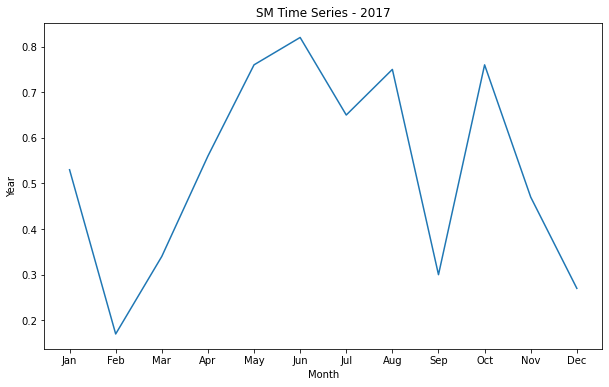

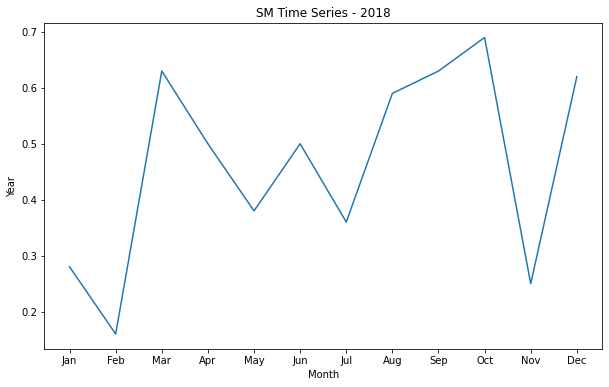

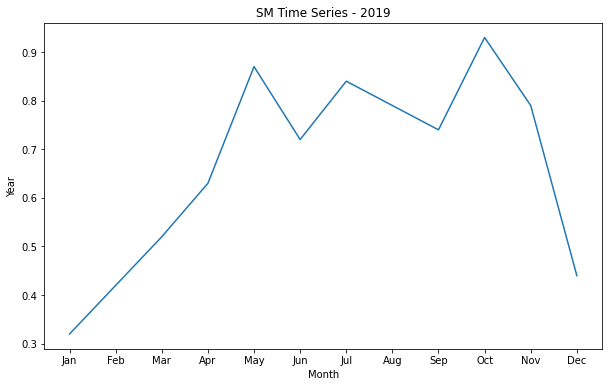

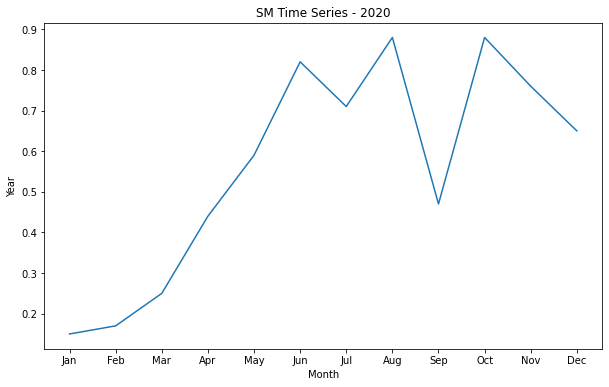

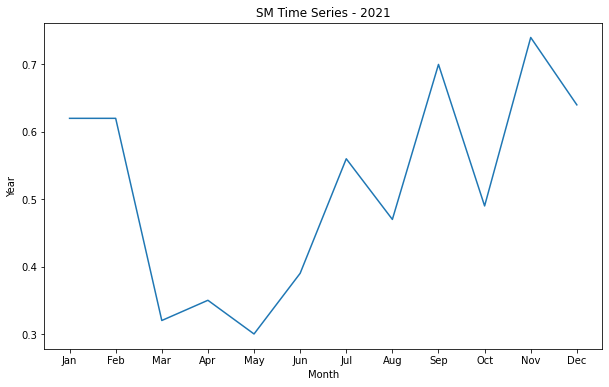

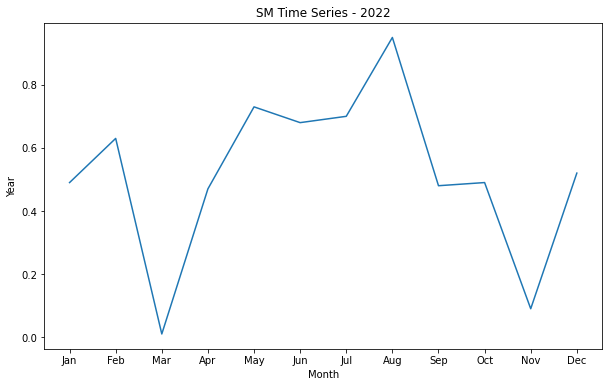

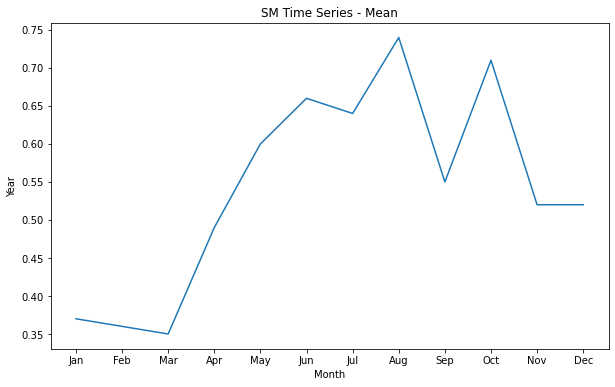

In [17]:
# plotting individual graph 

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6),  facecolor='white')
    ax.plot(df['Month/Year'], df[col])
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.title(f"SM Time Series - {col}")

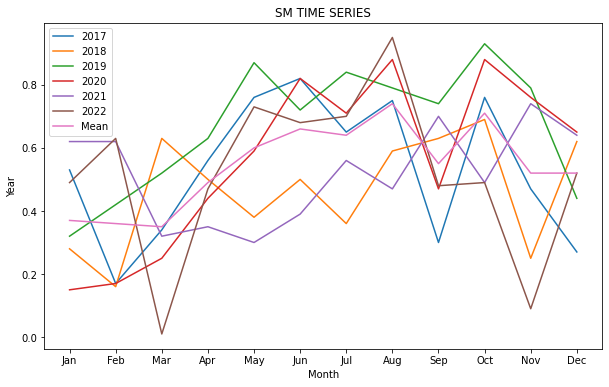

In [18]:
fig, ax = plt.subplots(figsize=(10, 6),  facecolor='white')

for col in columns:
    ax.plot(df['Month/Year'], df[col])
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.title('SM TIME SERIES')
    plt.legend(columns)
    plt.savefig(f'graphs/time-series/sm_normal.png')

### In the above graph we can smoothen with filter 

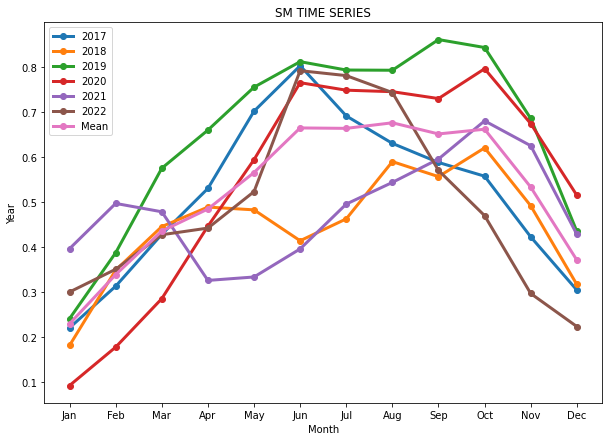

In [24]:
fig, ax = plt.subplots(figsize=(10, 7),  facecolor='white')

for col in columns:
    points = savgol_filter(df[col],window_length = 7, polyorder = 3 , mode = 'constant' )
    ax.plot(df['Month/Year'], points, 'o-', label = col, linewidth = 3 )
    ax.legend()
    
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.title('SM TIME SERIES')
    plt.savefig(f'graphs/time-series/sm_normal.png')